In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
#print(df.head(3))

In [70]:
def read_excel_data(filepath, filename):
  import os
  # Removed os.chdir(filepath)
  full_path = os.path.join(filepath, filename)
  print(f"Attempting to read from: {full_path}")
  df = pd.read_excel(full_path)
  return df

filepath = '/content/drive/MyDrive/KLEBCA TANVEER/PROJECT2.0'
filename = '/content/drive/MyDrive/KLEBCA TANVEER/startup_funding138 (1).xlsx'

df = read_excel_data(filepath, filename)

Attempting to read from: /content/drive/MyDrive/KLEBCA TANVEER/startup_funding138 (1).xlsx


In [71]:
#inspect first few rows
print("First 5 rows:")
print(df.head())

#basic info
print("\nBasic Info:")
print(df.info())


#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [72]:
# fill missing values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('UndisClosed')

In [73]:
#convert dae column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [74]:
#apply the function to the amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [75]:
#save cleaned data
df.to_csv("cleaned_startup_funding.csv", index=False)

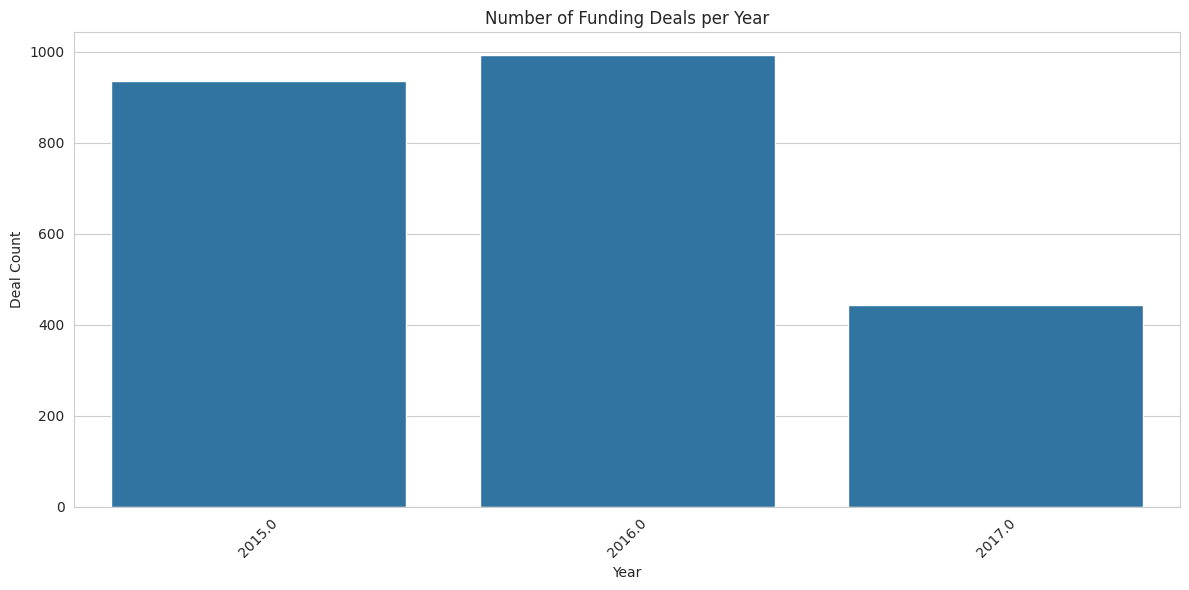

In [76]:
#Number of deals per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title("Number of Funding Deals per Year")
plt.xlabel('Year')
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

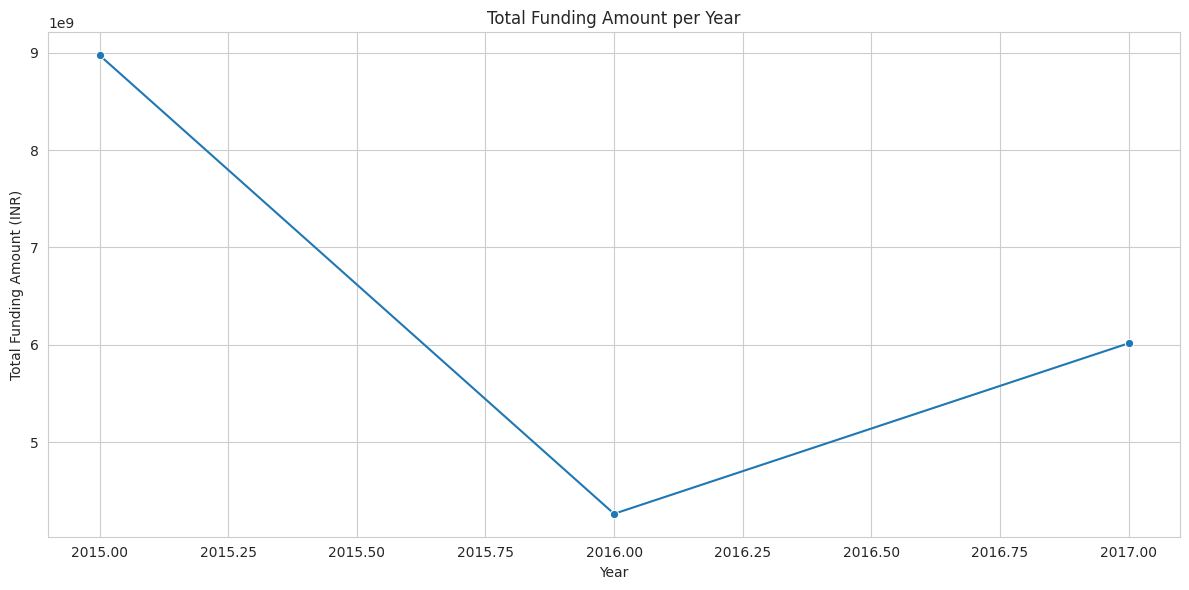

In [77]:
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title("Total Funding Amount per Year")
plt.xlabel('Year')
plt.ylabel("Total Funding Amount (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

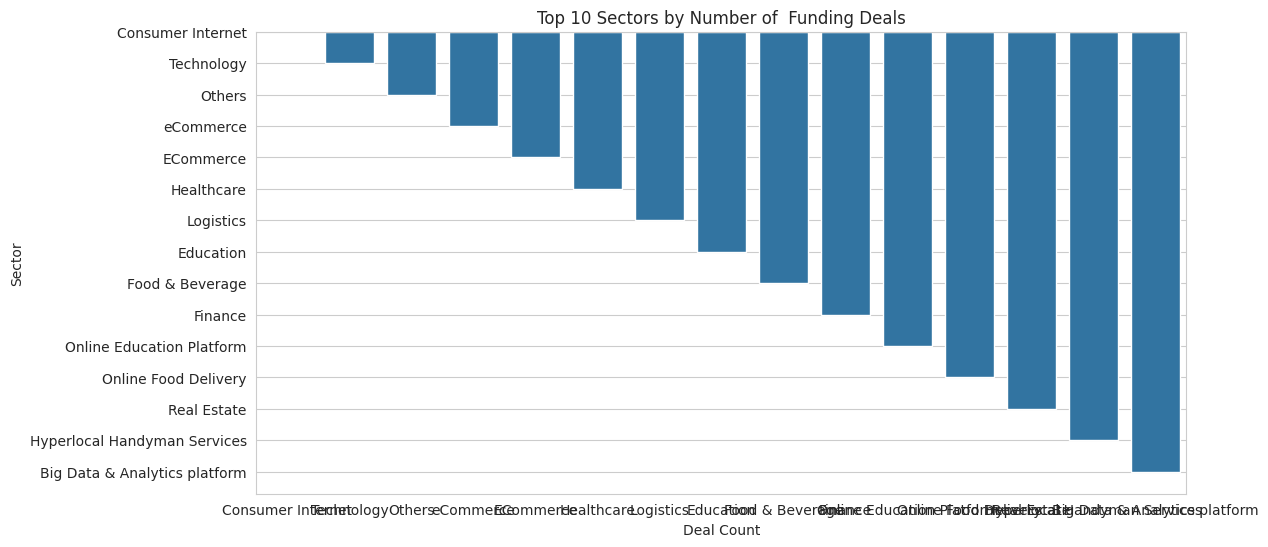

In [78]:
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.index)
plt.title("Top 10 Sectors by Number of  Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

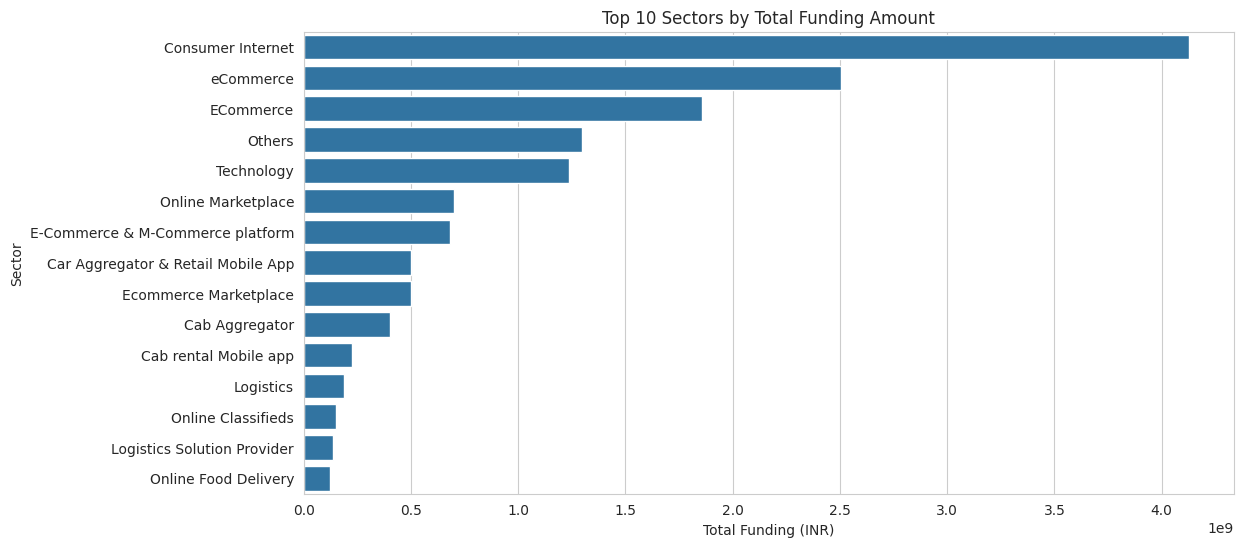

In [79]:
#top sectors by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace('E-Commerce', 'Ecommerce')
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()


In [80]:
investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()


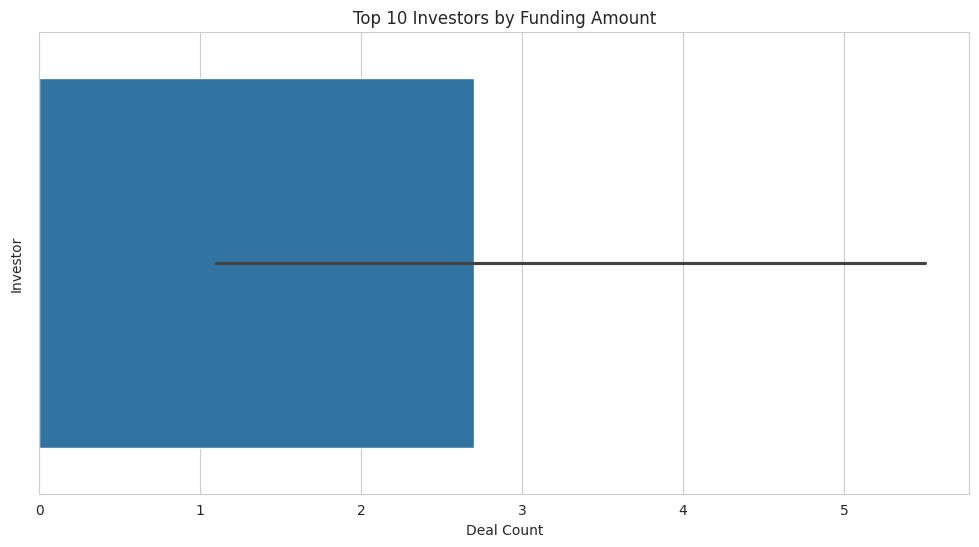

In [81]:
top_investors = investors_df.groupby('Investors_Name')['Amount_In_INR'].value_counts().head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='Investors_Name', data=top_investors)
plt.title("Top 10 Investors by Funding Amount")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.show()

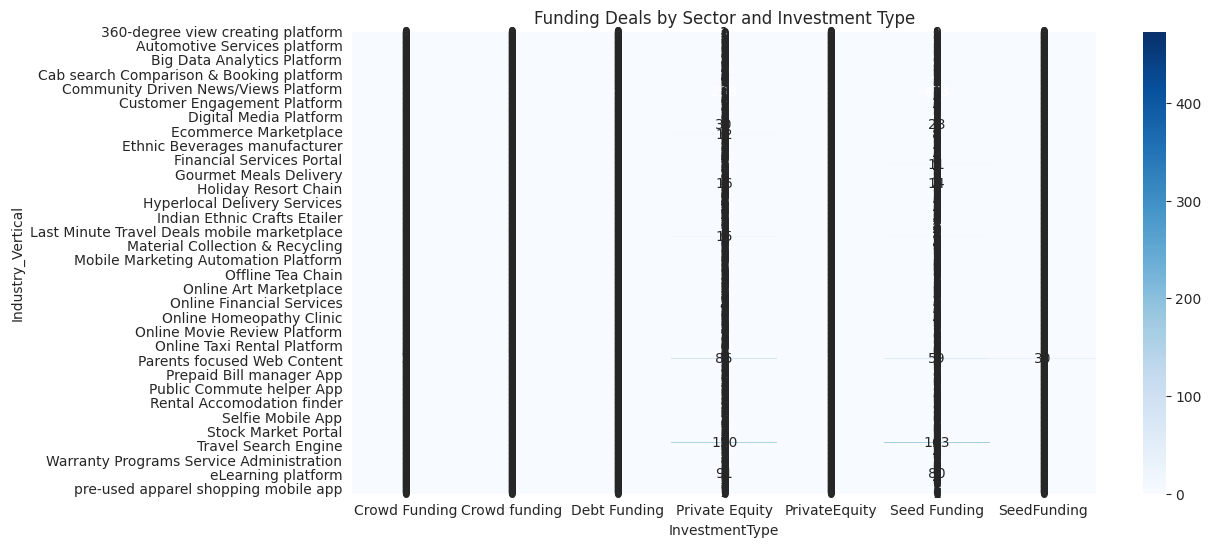

In [82]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12, 6))
sns.heatmap(sector_stage, annot=True,fmt="d" , cmap='Blues')
plt.title("Funding Deals by Sector and Investment Type")
plt.show()

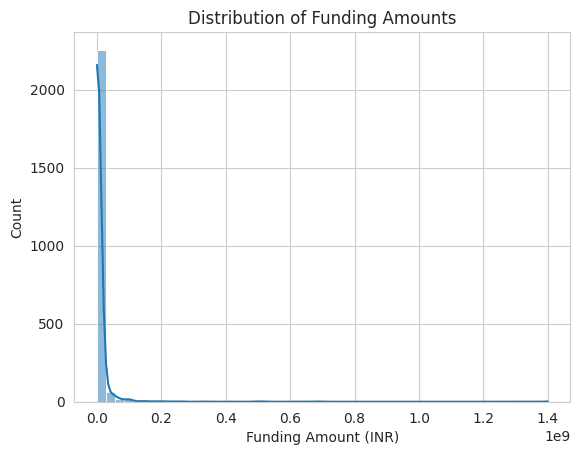

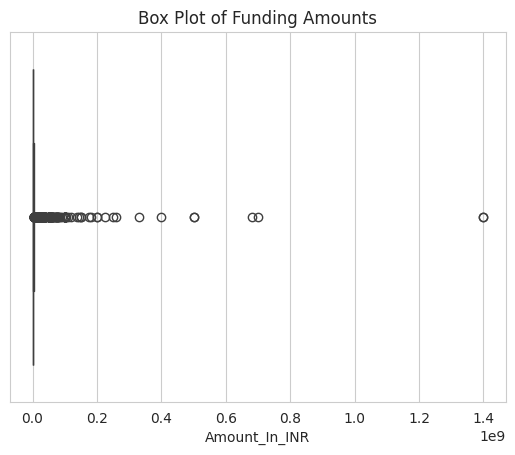

In [83]:
sns.histplot(df['Amount_In_INR'], bins=50 ,  kde=True)
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()


sns.boxplot(x=df['Amount_In_INR'])
plt.title("Box Plot of Funding Amounts")
plt.show()

In [84]:
investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()


In [85]:
def classify_investor(name):
  name = name.lower()
  if any(word in name for word in ['capital','ventures','partners','fund','vc','labs']):
    return 'vc'
  elif any(word in name for word in ['angel','network']):
    return 'angel'
  elif any(word in name for word in ['corp','limited','pvt','ltd','inc']):
    return 'corporate'
  else:
    return 'other'

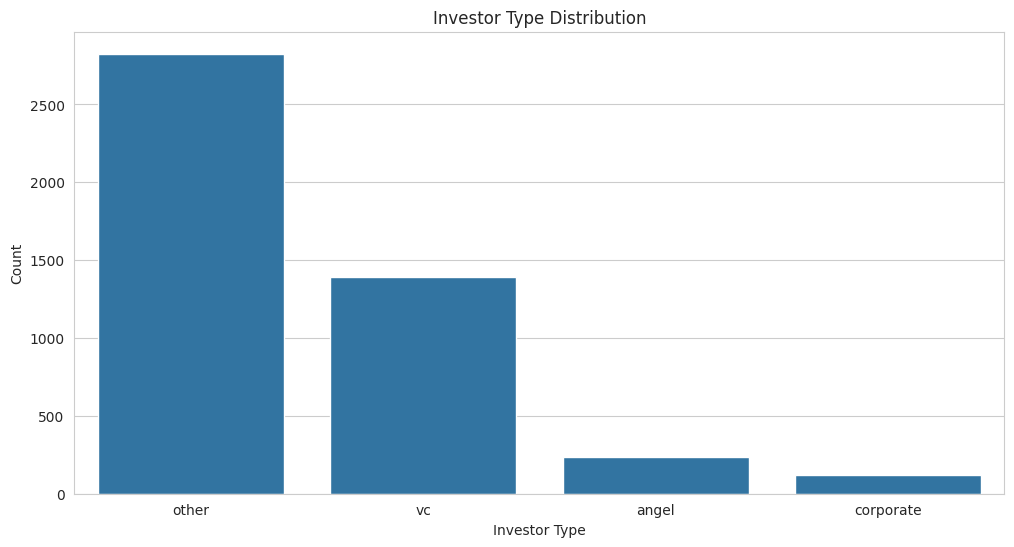

In [86]:
investors_df['Investors_type'] = investors_df['Investors_Name'].apply(classify_investor)
investors_type_counts = investors_df['Investors_type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=investors_type_counts.index, y=investors_type_counts.values)
plt.title('Investor Type Distribution')
plt.xlabel('Investor Type')
plt.ylabel('Count')
plt.show()


In [87]:
startup_growth = df.groupby(['StartupName','Year'])['Amount_In_INR'].sum().unstack().fillna(0)

top_startups = startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index

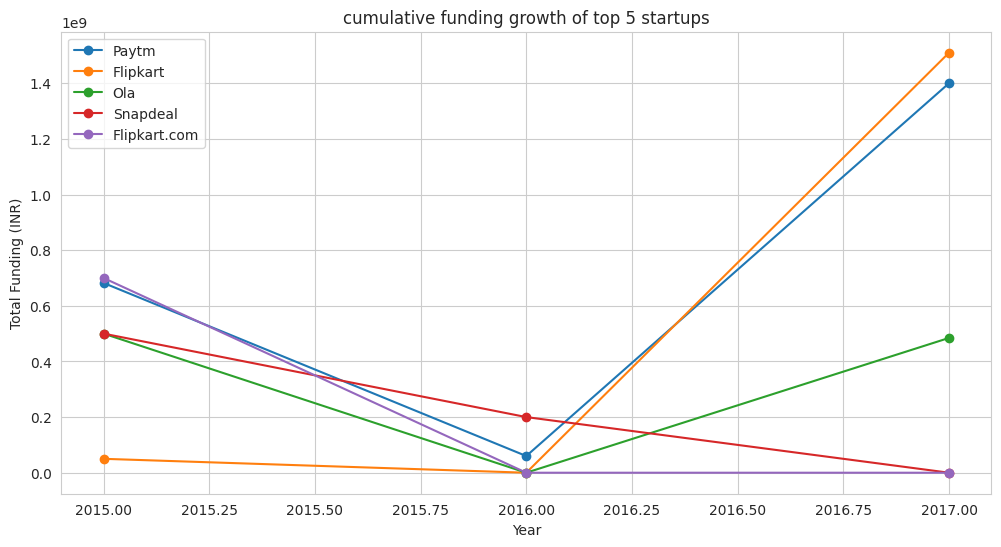

In [88]:
plt.figure(figsize=(12, 6))
for startup in top_startups:
    plt.plot(startup_growth.loc[startup].index, startup_growth.loc[startup].values, label=startup, marker='o')


plt.title("cumulative funding growth of top 5 startups")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

In [89]:
investors_df = df[['StartupName', 'Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [90]:
investor_startup_count = investors_df.groupby(['Investors_Name'])['StartupName'].size().reset_index(name='DealCount')
repeat_investors=investor_startup_count[investor_startup_count['DealCount']  > 1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name').value_counts().head(10)

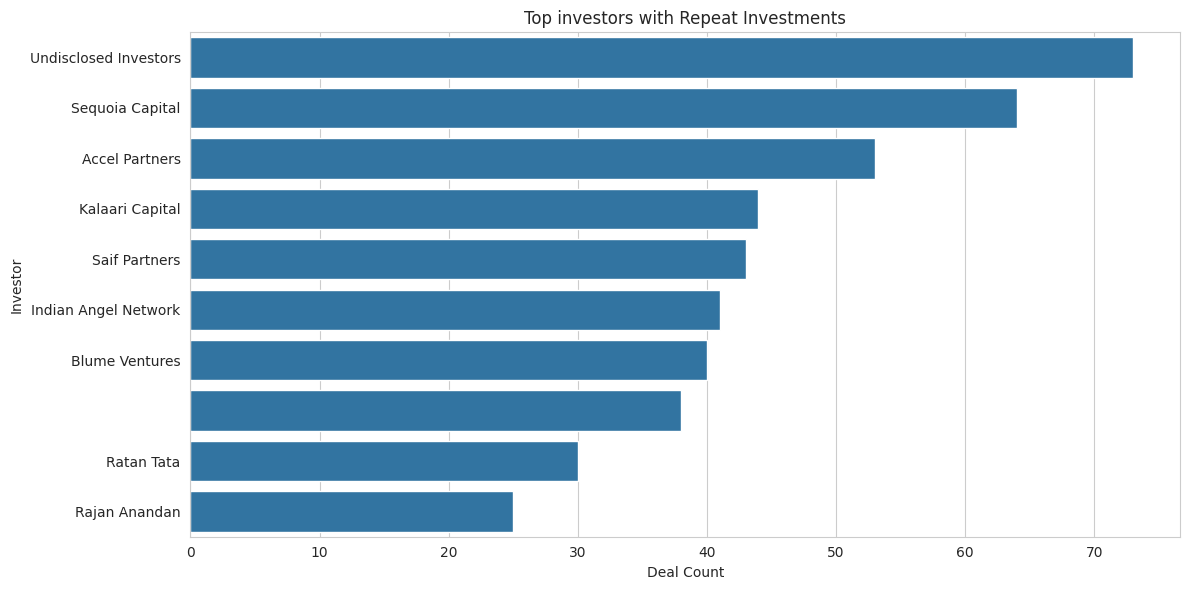

In [91]:
plt.figure(figsize=(12,6))

top_repeat_investors = repeat_investors.sort_values(by='DealCount', ascending=False).head(10)

sns.barplot(x=top_repeat_investors['DealCount'], y=top_repeat_investors['Investors_Name'])
plt.title("Top investors with Repeat Investments")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

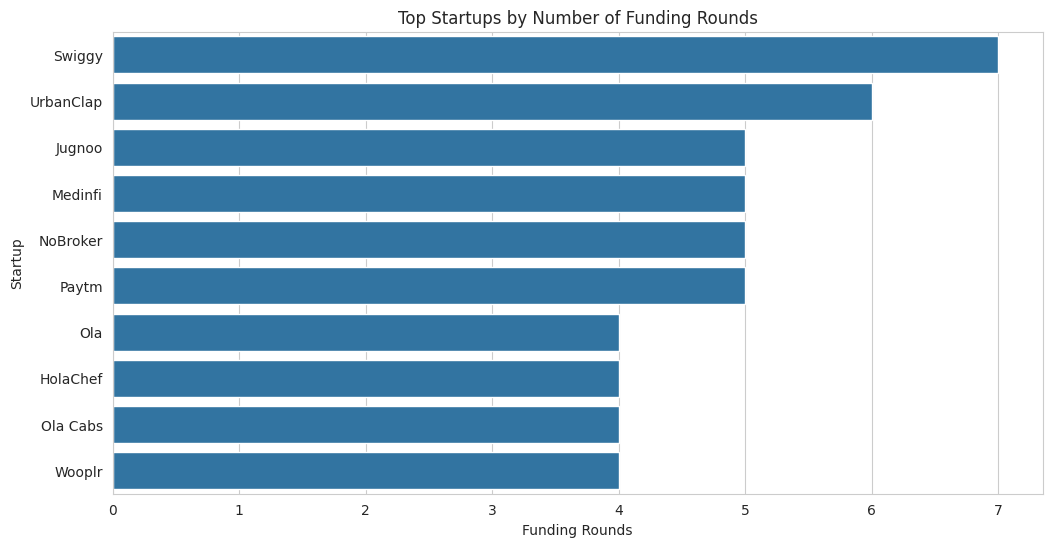

In [92]:
startup_rounds = df.groupby('StartupName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_rounds.values, y=startup_rounds.index)
plt.title("Top Startups by Number of Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Startup")
plt.show()

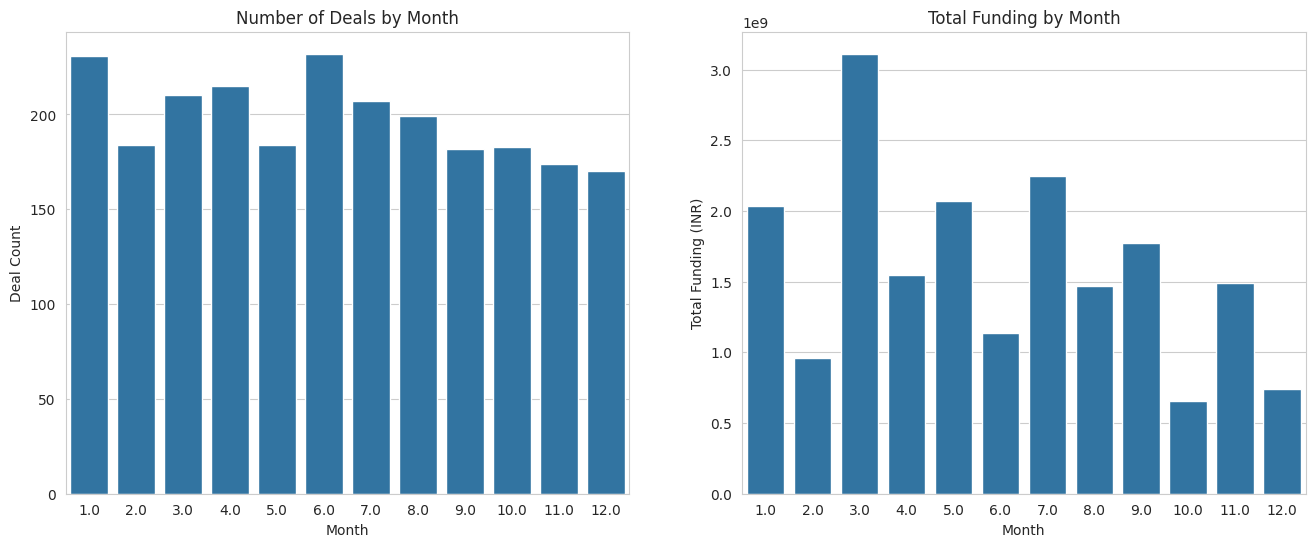

In [93]:
df['Month'] = df['Date'].dt.month

monthly_deals = df['Month'].value_counts().sort_index()
monthly_funding = df.groupby('Month')['Amount_In_INR'].sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=monthly_deals.index, y=monthly_deals.values, ax=ax[0])
ax[0].set_title("Number of Deals by Month")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Deal Count")

sns.barplot(x=monthly_funding.index, y=monthly_funding.values, ax=ax[1])
ax[1].set_title("Total Funding by Month")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Total Funding (INR)")

plt.show()

In [94]:
def read_excel_data(filepath, filename):
  import os
  os.chdir(filepath)
  df = pd.read_excel(filename)
  return df

filepath = '/content/drive/MyDrive/KLEBCA TANVEER/PROJECT2.0'
filename = '/content/drive/MyDrive/KLEBCA TANVEER/startup_funding138 (1).xlsx'

df = read_excel_data(filepath, filename)

In [95]:
undisclosed_deals = df[df ['Amount_In_INR'].isna()]

disclosed_deals = df [df['Amount_In_INR'].notna()]

print(f"Undisclosed Deals: {len(undisclosed_deals)}")

print(f"Disclosed Deals: {len(disclosed_deals)}")

labels = ['Disclosed', 'Undisclosed']

sizes = [len(disclosed_deals), len(undisclosed_deals)]

plt.figure(figsize=(8, 6))

Undisclosed Deals: 847
Disclosed Deals: 1525


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Disclosed Deals: 1525


<Figure size 800x600 with 0 Axes>

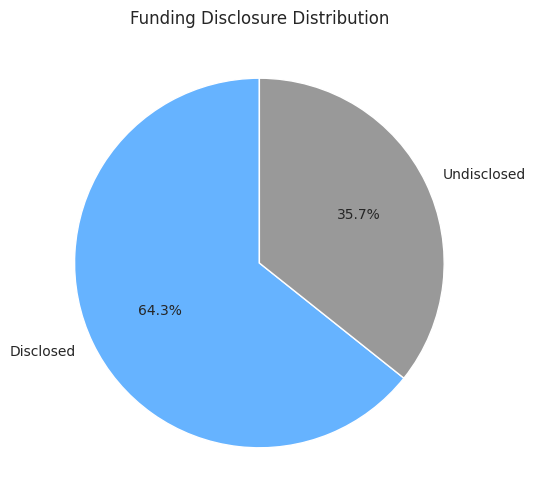

In [96]:
print(f"Disclosed Deals: {len(disclosed_deals)}")

labels = ['Disclosed', 'Undisclosed']

sizes = [len(disclosed_deals), len(undisclosed_deals)]

plt.figure(figsize=(8, 6))

labels = ['Disclosed', 'Undisclosed']

sizes = [len(disclosed_deals), len(undisclosed_deals)]

plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#999999'])

plt.title("Funding Disclosure Distribution")

plt.show()